In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [38]:
train = pd.read_csv('../test_and_train_auctions/train_data_encoded.csv')
test = pd.read_csv('../test_and_train_auctions/test_data_encoded.csv')

ref_hashes_train = train['ref_hash']
del train['ref_hash']

In [39]:
Xtrain, ytrain = train.iloc[:,:-1],train.iloc[:,-1]

In [40]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [41]:
# Entrenamiento
xg_reg.fit(Xtrain,ytrain)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [42]:
targets = pd.read_csv('../datos/target_competencia_ids.csv')

In [43]:
test['ref_hash'] = test['ref_hash'].astype('object')

In [44]:
merged_test_targets = targets.merge(test, on='ref_hash', how='left').drop('obj', axis=1)

In [45]:
auctions_merged = merged_test_targets.loc[merged_test_targets['ref_hash'].str.contains("_st")]

In [47]:
auctions_merged['time_to_auction'].fillna(259200, inplace=True)

/home/santiago/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
ref_hashes_auctions_merged = auctions_merged['ref_hash']
del auctions_merged['ref_hash']

Xtest, ytest = auctions_merged.iloc[:,:-1], auctions_merged.iloc[:,-1]

In [49]:
df_ytest = pd.DataFrame(ytest)
df_ytest.reset_index(inplace=True)
del df_ytest['index']

In [50]:
Xtest.reset_index(inplace=True)
del Xtest['index']

In [51]:
# Prediccion
preds = xg_reg.predict(Xtest)

In [52]:
df_preds = pd.DataFrame(preds)
df_preds['ytest'] = df_ytest['time_to_auction']
df_preds

,0,ytest
0,82640.679688,167776.943525
1,124583.390625,146573.807116
2,83727.437500,73885.989196
3,168738.156250,259200.000000
4,82640.679688,186611.246260
5,87322.687500,146233.135303
6,84729.562500,53093.115074
7,81772.101562,139566.262287
8,168738.156250,259200.000000
9,85942.500000,191095.993332


In [53]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 79249.889665


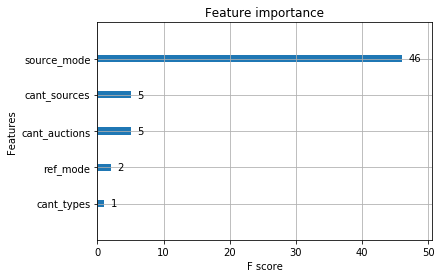

In [54]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [56]:
df = pd.DataFrame(ref_hashes_auctions_merged)
df['predictions'] = preds
df.to_csv('../submit_kaggle/pred_auctionss.csv', index=False)
df

,ref_hash,predictions
1,1000169251625791246_st,82640.679688
3,1000395625957344683_st,124583.390625
5,1003027494996471685_st,83727.437500
7,1006670001679961544_st,168738.156250
9,1007573308966476713_st,82640.679688
11,1010070503877148763_st,87322.687500
13,1010265377387765028_st,84729.562500
15,1010531372912327058_st,81772.101562
17,1011610998357271358_st,168738.156250
19,1013543838965040946_st,85942.500000
